# Milestones 1

## Perkenalan 

`Name : Aan Nurliyanah`

`Batch : 002`

Link Hugging Face :

https://huggingface.co/spaces/nurliyanahaan/deploy_m1


Link Koyeb :

https://deploym1-nurliyanahaan.koyeb.app/



## Assignment Objectives

Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 2 :

- Mampu memahami konsep Artificial Neural Network.
- Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
- Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.
- Mampu menganalisis dan menjelaskan layer yang dibuat.

## Import Libraries

In [1]:
!pip install tensorflow
!pip install feature_engine

# untuk perhitungan data, pengolahan data, dan visualisasi data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# untuk definisi model 
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout

# untuk spliting data
from sklearn.model_selection import train_test_split

# untuk preprocessing data, handling mv, feature selection, scaler, encoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder, OrdinalEncoder 
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# untuk menampilkan model pipeline
from sklearn import set_config
set_config(display='diagram')

# untuk handling imbalance
from imblearn.over_sampling import SMOTENC

# untuk pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipe
from sklearn.compose import ColumnTransformer

# untuk evaluasi model 
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay

# untuk import model 
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Loading and Overview 

Dataset ini diambil dari sumber Kaggle :


https://www.kaggle.com/datasets/blastchar/telco-customer-churn


About Dataset :
1. customerID : Customer ID
2. gender : Whether the customer is a male or a female
3. SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
4. Partner : Whether the customer has a partner or not (Yes, No)
5. Dependents : Whether the customer has a partner or not (Yes, No)
6. tenure : Number of months the customer has stayed with the company
7. PhoneService : Whether the customer has a phone service or not (Yes, No)
8. MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
9. InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
10. OnlineSecurity :Whether the customer has online security or not (Yes, No, No internet service)
11. OnlineBackup :Whether the customer has online backup or not (Yes, No, No internet service)
12. DeviceProtection :Whether the customer has device protection or not (Yes, No, No internet service)
13. TechSupport :Whether the customer has tech support or not (Yes, No, No internet service)
14. StreamingTV :Whether the customer has streaming TV or not (Yes, No, No internet service)
15. StreamingMovies :Whether the customer has streaming movies or not (Yes, No, No internet service)
16. Contract :The contract term of the customer (Month-to-month, One year, Two year)
17. PaperlessBilling :Whether the customer has paperless billing or not (Yes, No)
18. PaymentMethod :The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. MonthlyCharges :The amount charged to the customer monthly
20. TotalCharges :The total amount charged to the customer
21. Churn : Whether the customer churned or not (Yes or No)

In [2]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
!cp /content/kaggle.json ~/.kaggle

In [4]:
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


Download data menggunakan API dari kaggle.com 

In [5]:
!kaggle datasets download -d blastchar/telco-customer-churn

telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!unzip -q /content/telco-customer-churn.zip -d dataset

replace dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


Loading data dengan menggunakan pd.read_csv dan mendefinisikan jika terdapat values seperti '?',' ','99999','N/A' akan didefinisikan sebagai nan atau missing value, juga menggunakan parameter skipinitialspace untuk skip jika ada spasi di seluruh dataframe.

In [7]:
data = pd.read_csv('/content/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv',na_values=['?',' ','99999','N/A'],skipinitialspace=True)

Menampilkan dataset default 5 teratas dengan fungsi head

In [8]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


melihat ukuran data, banyak kolom dan baris

In [9]:
data.shape

(7043, 21)

menampilkan kolom dengan maksimal, agar semua kolom telihat 

In [10]:
pd.set_option('max_columns', None)

Menampilkan data default 5 terbawah dengan menggunakan fungsi tail

In [11]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


Melihat overview dari banyaknya baris dan kolom, dan jumlah baris di setiap kolom, nama kolom beserta tipe data nya.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dari overview diatas ada sejumlah missing value, jumlah baris 7043 terisi, dan 20 kolom. berikutnya akan kita double cek lagi.

Mengecek missing value

In [13]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Mengecek duplikat data

In [14]:
data[data.duplicated()].shape

(0, 21)

Membagi kolom numeric dan kategorical berdasarkan type datanya 

In [15]:
num_col = data.describe().columns.tolist()
cat_col = data.select_dtypes(include=['object']).columns.tolist()

In [16]:
data[num_col].columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [17]:
data[cat_col].columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

Setelah dilakukan overview didapatkan :
- ada missing value, akan dilakukan  simpleimputer di section selanjutnya
- tidak ada data duplikat 
- kolom customer ID akan di hapus karena hanya menampilkan data unique saja 
- Pembagian kolom akna dilakukan kembali sesuai dengan isi datanya apakah tergolong numeric atau categoric

## Data Cleaning

Membuat variabel baru dengan nama data_clean agar data asli tetap utuh.

In [18]:
data_clean = data.copy()

Menghaous kolom customerID

In [19]:
data_clean.drop(['customerID'],axis=1, inplace=True)

Melihat data target , kita akan mengganti Yes No, menjadi 1,0 

In [20]:
data_clean.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [21]:
data_clean.Churn.replace({'No': 0, 'Yes': 1}, inplace=True)
data_clean.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

Pengecekan kembali missing value

In [22]:
data_clean.isnull().sum().any()

True

membagi kolom numerical dan ketegorikal secara manual .

In [23]:
num = data_clean[['tenure','MonthlyCharges','TotalCharges']].columns.tolist()
cat = data_clean[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']].columns.tolist()

melihat central tendency dari numerical data

In [24]:
data_clean[num].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


Melihat value counts dari categoric kolom

In [25]:
for i in cat:
    print(i)
    print(data_clean[i].value_counts())
    print('-'*30)

gender
Male      3555
Female    3488
Name: gender, dtype: int64
------------------------------
SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
------------------------------
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
------------------------------
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
------------------------------
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
------------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
------------------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
------------------------------
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
------------------------------
OnlineBackup
No                     3088
Yes           

## Exploratory Data Analysis (EDA)

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya

Melihat visualisasi kolom gender terhadap churn 

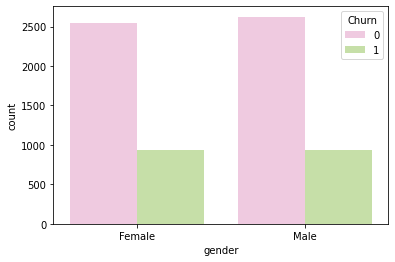

In [26]:
sns.countplot(data=data_clean,x='gender',hue='Churn',palette="PiYG")

Didapatkan bahwa jumlah customer yang tidak churn terbanyak adalah Male, dan untuk yang churn jumlah keduanya sama.

Melihat visualisasi paymnetmethod terhadap churn 

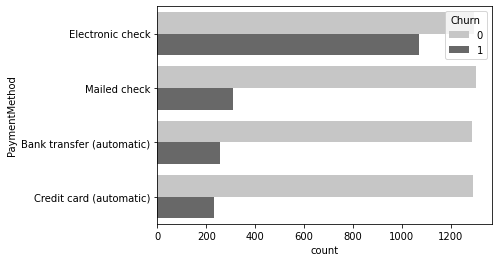

In [27]:
sns.countplot(data=data_clean,y='PaymentMethod',hue='Churn',palette="Greys")

dari visualisasi diatas didapatkan bahwa jumlah customer yang churn lebih banyak menggunakna payment method melalui electronic check. 

Melihat visualisasi antara contract terhadap churn 

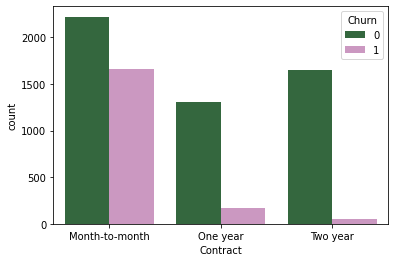

In [28]:
sns.countplot(data=data_clean,x='Contract',hue='Churn',palette="cubehelix")

Dari visualisasi diatas didapatkan bahwa jumlah customer yang tingkat churn nya paling tinggi ada di contract Month to month

Melihat visualisasi Senior citizen terhadap churn

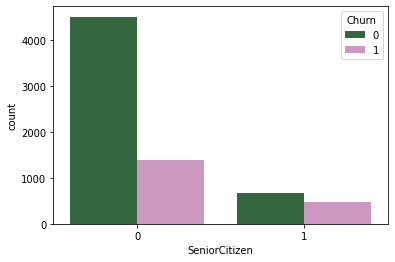

In [29]:
sns.countplot(data=data_clean,x='SeniorCitizen',hue='Churn',palette="cubehelix")

Terlihat bahawa banyaknya customer yang churn adalah custumer yang statusnya tidak senior citizen

Melihat visualisasi target Churn 

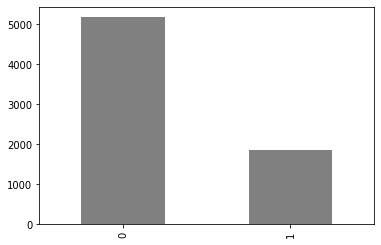

In [30]:
data_clean['Churn'].value_counts().plot(kind='bar',color='Grey')

In [31]:
data_clean.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

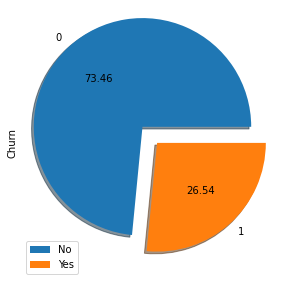

In [32]:
plt.figure(figsize = (8,5),facecolor='white')
data_clean['Churn'].value_counts().plot(kind = 'pie',explode = [0.2,0.0], shadow = True,autopct = "%.2f")
plt.legend(['No','Yes'])
plt.show()

Jumlah customer churn sebesar 26.54 % lebih sedikit daripada customer yang tidak churn sebesar 73.46% , data mild imbalance.

### Split dataset 

Split data sebagai fitur dan target yang akan digunakan sebagai target adalah Churn dan sisanya adalah feature, data dibagi kedalan x trainfull, y trainfull, xtest dan y test. Setelahnya dari data strainfull dan y trainfull akan dibagi lagi kedalam xtrain, xval, ytrain, yval 

In [33]:
fitur = data_clean.drop('Churn', axis=1)
target = data_clean['Churn']

In [34]:
x_train_full, x_test,  y_train_full, y_test = train_test_split(fitur,
                                                               target,
                                                               shuffle=True, test_size=0.2,
                                                               stratify= target,random_state=0
                                                               )

x_train, x_val, y_train, y_val = train_test_split(x_train_full,
                                                  y_train_full,
                                                  shuffle=True, test_size=0.2,random_state=0)

Menggabungkan data xtrainfull dan ytrainfull untuk preprocess

In [35]:
data_eda = pd.concat([x_train_full, y_train_full], axis=1)
data_eda.shape

(5634, 20)

In [36]:
data_eda.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2499,Male,0,No,Yes,41,Yes,No,DSL,Yes,Yes,Yes,No,Yes,No,One year,No,Mailed check,70.2,2894.55,0
5807,Male,0,No,No,57,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.8,1094.35,0
5118,Female,0,Yes,No,42,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),85.9,3729.75,0


Menggunakan data xtraineda untuk latihan 

In [37]:
X_train_eda = x_train_full.copy()

membagi kolom numerical dan categorical 

In [38]:
nums = data_eda[['tenure','MonthlyCharges','TotalCharges']].columns.tolist()
cats = data_eda[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']].columns.tolist()

### Numerical feature

Melihat berapa nilai skew dari kolom numerical

In [39]:
skew = data_eda[nums].skew()
nilai_skew = pd.DataFrame(skew)
nilai_skew.columns =['distribusi']

nilai_skew

,distribusi
tenure,0.251523
MonthlyCharges,-0.198716
TotalCharges,0.984026


In [40]:
skew.loc[lambda x : (x < -0.5) | (x > 0.5)]

TotalCharges    0.984026
dtype: float64

Untuk distribusi yang tidak normal hanya total charges, 2 lainnya termasuk distribusi normal, mari kita lihat visualisasinya.

In [41]:
numerical = data_eda[nums]

In [42]:
def diagnostic_plots(numerical, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(numerical[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=numerical[variable])
    plt.title('Boxplot')

    plt.show()

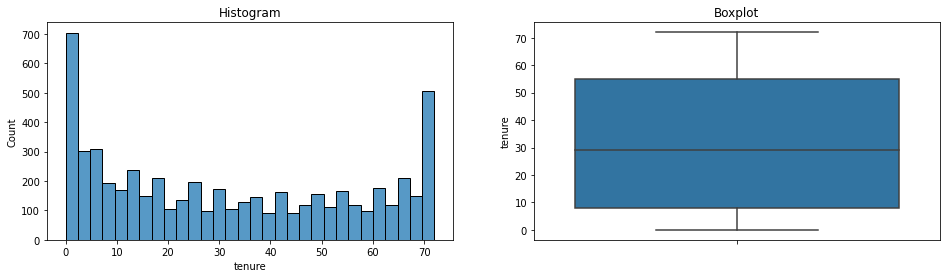

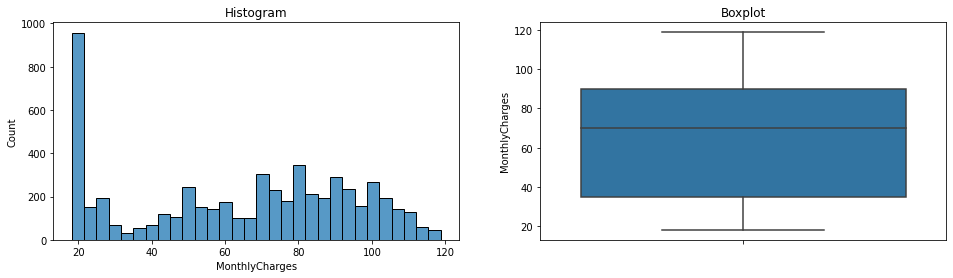

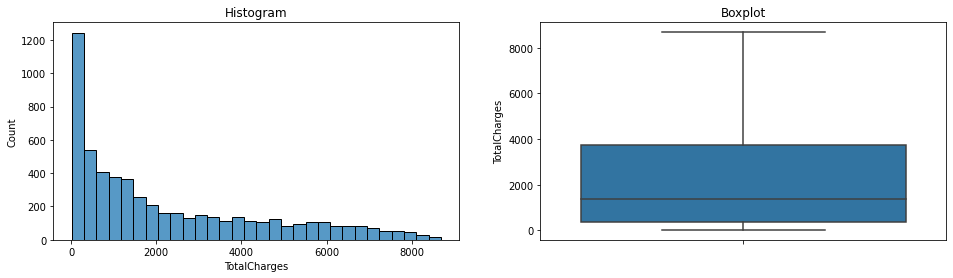

In [43]:
diagnostic_plots(numerical, 'tenure')
diagnostic_plots(numerical, 'MonthlyCharges')
diagnostic_plots(numerical, 'TotalCharges')

dari visualisasi diatas didapatkan bahwa tidak ada outlier yang terdeteksi , dan juga terlihat distribusi nya 2 normal dan 1 mempunyai skew. Kita lanjut untuk mengecek nilai outlier dengan metode gaussian.

In [44]:
for k in numerical:
  mean = numerical[k].mean()
  std = numerical[k].std()

  upper = mean + (3 * std)
  lower = mean - (3 * std)

  outlier = numerical[(numerical[k] > upper) | (numerical[k] < lower)]
  print(k)
  print('count of outlier: ', outlier.shape[0])
  print('percent k of outlier: ', outlier.shape[0]/numerical.shape[0] * 100, '%')
  print('='*70)

tenure
count of outlier:  0
percent k of outlier:  0.0 %
MonthlyCharges
count of outlier:  0
percent k of outlier:  0.0 %
TotalCharges
count of outlier:  0
percent k of outlier:  0.0 %


tidak ada outlier terdeteksi, maka dari itu tidak dilakukan handling outlier. 

#### Handling Missing Value

Mengecek jumlah missing value 

In [45]:
X_train_eda[nums].isnull().sum()

tenure            0
MonthlyCharges    0
TotalCharges      9
dtype: int64

melakukan simpleimputer dengan strategy mean.

In [46]:
imp_num = SimpleImputer(strategy='mean')

X_train_eda[nums] = imp_num.fit_transform(X_train_eda[nums])
X_train_eda[nums].isnull().sum()

tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

Melihat central tendency setelah dilakukan imputasi.

In [47]:
X_train_eda[nums].describe()

,tenure,MonthlyCharges,TotalCharges
count,5634.000000,5634.000000,5634.000000
mean,32.096912,64.365735,2254.860080
std,24.510609,30.079021,2254.365942
min,0.000000,18.250000,18.850000
25%,8.000000,35.100000,386.675000
50%,29.000000,70.025000,1379.175000
75%,55.000000,89.750000,3725.987500
max,72.000000,118.750000,8684.800000


#### Scaling 

Melakukan scaling dengan metode standard scaler karena distribusi normal 

In [48]:
scaler = StandardScaler()

X_train_eda[nums] = scaler.fit_transform(X_train_eda[nums])
X_train_eda

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2499,Male,0,No,Yes,0.363266,Yes,No,DSL,Yes,Yes,Yes,No,Yes,No,One year,No,Mailed check,0.193982,0.283781
5807,Male,0,No,No,1.016103,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),-1.515002,-0.514829
5118,Female,0,Yes,No,0.404069,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),0.715987,0.654295
275,Male,0,Yes,No,-1.105616,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,No,Month-to-month,Yes,Electronic check,0.699362,-0.822371
1350,Female,0,Yes,No,1.424126,Yes,Yes,DSL,Yes,Yes,Yes,No,No,No,Two year,No,Mailed check,0.042700,0.917408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,Female,0,No,No,-0.126361,Yes,Yes,DSL,No,Yes,No,No,No,No,One year,Yes,Electronic check,-0.303086,-0.281550
1954,Male,0,No,No,-1.268825,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.368538,-0.966837
525,Male,0,No,No,0.812091,Yes,No,Fiber optic,Yes,No,Yes,No,Yes,No,One year,No,Electronic check,0.893867,1.101711
5748,Female,0,No,No,-0.452779,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),1.179806,-0.116367


#### Feature Selection using Annova

definisi feature

In [49]:
numericals = X_train_eda[nums]

In [50]:
numericals

,tenure,MonthlyCharges,TotalCharges
2499,0.363266,0.193982,0.283781
5807,1.016103,-1.515002,-0.514829
5118,0.404069,0.715987,0.654295
275,-1.105616,0.699362,-0.822371
1350,1.424126,0.042700,0.917408
...,...,...,...
1712,-0.126361,-0.303086,-0.281550
1954,-1.268825,0.368538,-0.966837
525,0.812091,0.893867,1.101711
5748,-0.452779,1.179806,-0.116367


definisi target 

In [51]:
targets = pd.DataFrame(y_train_full)

In [52]:
targets

,Churn
2499,0
5807,0
5118,0
275,1
1350,0
...,...
1712,0
1954,1
525,0
5748,0


In [53]:
f_test = SelectKBest(score_func=f_classif, k=3)
fit = f_test.fit(numericals, targets)
fit.scores_

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([776.36404756, 214.58234411, 224.92058413])

In [54]:
np.round_(fit.scores_)

array([776., 215., 225.])

Melihat result annova

In [55]:
result = pd.Series(fit.scores_)
result.index = numericals.columns
result.sort_values(ascending=False)

tenure            776.364048
TotalCharges      224.920584
MonthlyCharges    214.582344
dtype: float64

dari pemilihan feature selection menggunakan annova dan menetapkan treshold > 100 , maka dapat kita ambil 3 feature dari numerical yaitu tenure, Totalcharges, MonthlyCharges. 

### Categorical feature

Melihat categorical columns

In [56]:
data_eda[cats].columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

#### Ordinal Encoder

Melakukan ordinal encoder pada kolom : 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract','PaperlessBilling',

In [57]:
gender =['Male', 'Female']
SeniorCitizen=[0,1]
Partner =['No', 'Yes']
Dependents =['No', 'Yes']
PhoneService =['No', 'Yes']
MultipleLines = ['No phone service','No', 'Yes']
InternetService = ['No','DSL', 'Fiber optic']
OnlineSecurity= ['No internet service','No','Yes']
OnlineBackup =['No internet service','No','Yes']
DeviceProtection=['No internet service','No','Yes']
TechSupport=['No internet service', 'No', 'Yes']
StreamingTV=['No internet service', 'No', 'Yes']
StreamingMovies=['No internet service', 'No', 'Yes']
Contract= ['Month-to-month', 'One year', 'Two year']
PaperlessBilling=['No','Yes']

ord_enc = OrdinalEncoder(categories=[gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,
                                     DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling])
cat_ord = pd.DataFrame(ord_enc.fit_transform(X_train_eda[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                                     'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling']]))

cat_ord.columns = ['gender2','SeniorCitizen2','Partner2','Dependents2','PhoneService2','MultipleLines2','InternetService2','OnlineSecurity2','OnlineBackup2',
                                     'DeviceProtection2','TechSupport2','StreamingTV2','StreamingMovies2','Contract2','PaperlessBilling2']

#### OHE

Melakukan OHE pada kolom PaymentMethod

In [58]:
ohe_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(X_train_eda[['PaymentMethod']]))
cat_ohe.columns = ohe_enc.get_feature_names(['PaymentMethod'])

review = pd.concat([X_train_eda[['PaymentMethod']].reset_index(drop=True), cat_ohe], axis=1)
review.head(5)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,PaymentMethod,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Mailed check,0.0,0.0,0.0,1.0
1,Credit card (automatic),0.0,1.0,0.0,0.0
2,Credit card (automatic),0.0,1.0,0.0,0.0
3,Electronic check,0.0,0.0,1.0,0.0
4,Mailed check,0.0,0.0,0.0,1.0


Menyatukan hasil encoder 

In [59]:
data_eda_encoder = pd.concat([X_train_eda.reset_index(drop=True), cat_ohe, cat_ord], axis=1)
data_eda_encoder

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender2,SeniorCitizen2,Partner2,Dependents2,PhoneService2,MultipleLines2,InternetService2,OnlineSecurity2,OnlineBackup2,DeviceProtection2,TechSupport2,StreamingTV2,StreamingMovies2,Contract2,PaperlessBilling2
0,Male,0,No,Yes,0.363266,Yes,No,DSL,Yes,Yes,Yes,No,Yes,No,One year,No,Mailed check,0.193982,0.283781,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0
1,Male,0,No,No,1.016103,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),-1.515002,-0.514829,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2,Female,0,Yes,No,0.404069,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),0.715987,0.654295,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0
3,Male,0,Yes,No,-1.105616,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,No,Month-to-month,Yes,Electronic check,0.699362,-0.822371,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,1.0
4,Female,0,Yes,No,1.424126,Yes,Yes,DSL,Yes,Yes,Yes,No,No,No,Two year,No,Mailed check,0.042700,0.917408,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,Female,0,No,No,-0.126361,Yes,Yes,DSL,No,Yes,No,No,No,No,One year,Yes,Electronic check,-0.303086,-0.281550,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
5630,Male,0,No,No,-1.268825,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.368538,-0.966837,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
5631,Male,0,No,No,0.812091,Yes,No,Fiber optic,Yes,No,Yes,No,Yes,No,One year,No,Electronic check,0.893867,1.101711,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0
5632,Female,0,No,No,-0.452779,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),1.179806,-0.116367,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,0.0,1.0


Hasil ohe dan ord encoder disatukan menjadi category

In [60]:
cat_ohe

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
5629,0.0,0.0,1.0,0.0
5630,0.0,0.0,1.0,0.0
5631,0.0,0.0,1.0,0.0
5632,0.0,1.0,0.0,0.0


In [61]:
cat_ord

,gender2,SeniorCitizen2,Partner2,Dependents2,PhoneService2,MultipleLines2,InternetService2,OnlineSecurity2,OnlineBackup2,DeviceProtection2,TechSupport2,StreamingTV2,StreamingMovies2,Contract2,PaperlessBilling2
0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2,1.0,0.0,1.0,0.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
5630,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
5631,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0
5632,1.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,0.0,1.0


In [62]:
category = pd.concat([cat_ohe, cat_ord], axis=1)

In [63]:
category

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender2,SeniorCitizen2,Partner2,Dependents2,PhoneService2,MultipleLines2,InternetService2,OnlineSecurity2,OnlineBackup2,DeviceProtection2,TechSupport2,StreamingTV2,StreamingMovies2,Contract2,PaperlessBilling2
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
5630,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
5631,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0
5632,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,0.0,1.0


#### Feature Selection using CHI2 

In [64]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(category, y_train_full)
fit.scores_

array([5.88418470e+01, 7.38560879e+01, 3.30162379e+02, 3.63351316e+01,
       5.54689724e-01, 1.07960904e+02, 6.42127198e+01, 1.03620649e+02,
       9.32371705e-02, 1.75337307e+00, 2.80467583e+02, 1.20300540e+00,
       1.40106621e+01, 1.92966504e+01, 1.93196144e+00, 7.51138520e+01,
       7.26574560e+01, 8.95404083e+02, 8.83394495e+01])

In [65]:
np.round_(fit.scores_)

array([ 59.,  74., 330.,  36.,   1., 108.,  64., 104.,   0.,   2., 280.,
         1.,  14.,  19.,   2.,  75.,  73., 895.,  88.])

In [66]:
chi = pd.Series(fit.scores_)
chi.index = category.columns
chi.sort_values(ascending=False)

Contract2                                  895.404083
PaymentMethod_Electronic check             330.162379
InternetService2                           280.467583
SeniorCitizen2                             107.960904
Dependents2                                103.620649
PaperlessBilling2                           88.339449
StreamingTV2                                75.113852
PaymentMethod_Credit card (automatic)       73.856088
StreamingMovies2                            72.657456
Partner2                                    64.212720
PaymentMethod_Bank transfer (automatic)     58.841847
PaymentMethod_Mailed check                  36.335132
DeviceProtection2                           19.296650
OnlineBackup2                               14.010662
TechSupport2                                 1.931961
MultipleLines2                               1.753373
OnlineSecurity2                              1.203005
gender2                                      0.554690
PhoneService2               

Feature yang terpilih setelah menerapkan treshold sebesar >100 maka didapatkan feature dari categorical : Contract2','PaymentMethod_Electronic check',
'InternetService2','SeniorCitizen','Dependents2'

In [67]:
data_model = data_eda_encoder[['tenure','TotalCharges','MonthlyCharges','Contract2','PaymentMethod_Electronic check',
'InternetService2','SeniorCitizen','Dependents2']]

In [68]:
data_model

,tenure,TotalCharges,MonthlyCharges,Contract2,PaymentMethod_Electronic check,InternetService2,SeniorCitizen,Dependents2
0,0.363266,0.283781,0.193982,1.0,0.0,1.0,0,1.0
1,1.016103,-0.514829,-1.515002,2.0,0.0,0.0,0,0.0
2,0.404069,0.654295,0.715987,0.0,0.0,2.0,0,0.0
3,-1.105616,-0.822371,0.699362,0.0,1.0,2.0,0,0.0
4,1.424126,0.917408,0.042700,2.0,0.0,1.0,0,0.0
...,...,...,...,...,...,...,...,...
5629,-0.126361,-0.281550,-0.303086,1.0,1.0,1.0,0,0.0
5630,-1.268825,-0.966837,0.368538,0.0,1.0,2.0,0,0.0
5631,0.812091,1.101711,0.893867,1.0,1.0,2.0,0,0.0
5632,-0.452779,-0.116367,1.179806,0.0,0.0,2.0,0,0.0


## Data Preprocessing

### Pipeline

In [69]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2463,Male,0,Yes,No,8,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),85.65,659.45
4018,Female,0,Yes,Yes,7,Yes,No,DSL,Yes,Yes,Yes,No,Yes,No,One year,No,Electronic check,69.45,477.05
461,Female,0,Yes,No,24,Yes,No,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),69.45,1614.05
2128,Male,0,Yes,Yes,41,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),74.55,3023.55
3595,Female,1,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),70.20,115.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,Male,1,Yes,No,72,Yes,No,Fiber optic,Yes,Yes,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.80,6141.65
2714,Female,0,No,No,54,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),95.10,5064.85
1675,Female,0,No,No,29,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,78.90,2384.15
5115,Male,0,Yes,No,46,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Mailed check,65.65,3047.15


Membuat numerical pipeline dengan menerapkan imputasi dan scaling, kemudian categorical dengan mereapkan ordinal dan ohe encoder, dan menyatukannya kedalan full_pipeline

In [70]:
num_pipeline = Pipeline([
        ('imp_num', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

cat_1_pipeline = Pipeline([
        ('ord_enc', OrdinalEncoder(categories=[Contract,InternetService,Dependents,SeniorCitizen])) 
    ])

cat_2_pipeline = Pipeline([
        ('ohe_enc', OneHotEncoder(handle_unknown='ignore'))
    ])



In [71]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['tenure','MonthlyCharges','TotalCharges']),
        ("cat_ord", cat_1_pipeline, ['Contract','InternetService','Dependents','SeniorCitizen']),
        ("cat_ohe", OneHotEncoder(), ['PaymentMethod']),
        ],verbose=True)


In [72]:
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imp_num', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('cat_ord',
                                 Pipeline(steps=[('ord_enc',
                                                  OrdinalEncoder(categories=[['Month-to-month',
                                                                              'One '
                                                                              'year',
                                                                              'Two '
                                                                              'year'],
                                                                             ['No',
                                                                              'DSL',
                                                                              'Fiber '
                                                                              'optic'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             [0,
                                                                              1]]))]),
                                 ['Contract', 'InternetService', 'Dependents',
                                  'SeniorCitizen']),
                                ('cat_ohe', OneHotEncoder(),
                                 ['PaymentMethod'])],
                  verbose=True)

In [73]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2463,Male,0,Yes,No,8,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),85.65,659.45
4018,Female,0,Yes,Yes,7,Yes,No,DSL,Yes,Yes,Yes,No,Yes,No,One year,No,Electronic check,69.45,477.05
461,Female,0,Yes,No,24,Yes,No,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),69.45,1614.05
2128,Male,0,Yes,Yes,41,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),74.55,3023.55
3595,Female,1,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),70.20,115.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,Male,1,Yes,No,72,Yes,No,Fiber optic,Yes,Yes,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.80,6141.65
2714,Female,0,No,No,54,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),95.10,5064.85
1675,Female,0,No,No,29,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,78.90,2384.15
5115,Male,0,Yes,No,46,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Mailed check,65.65,3047.15


Menerapkan pipeline di fit Transform ke feature terpilih di data x_train 

In [74]:
X_train = full_pipeline.fit_transform(x_train[['tenure','TotalCharges','MonthlyCharges','Contract',
'InternetService','SeniorCitizen','Dependents','PaymentMethod']])


[ColumnTransformer] ........... (1 of 3) Processing num, total=   0.0s
[ColumnTransformer] ....... (2 of 3) Processing cat_ord, total=   0.0s
[ColumnTransformer] ....... (3 of 3) Processing cat_ohe, total=   0.0s


In [75]:
X_train.shape

(4507, 11)

In [76]:
Xmodel = pd.DataFrame(X_train)
Xmodel

,0,1,2,3,4,5,6,7,8,9,10
0,-0.982495,0.701932,-0.710381,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.023155,0.164256,-0.790990,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.331931,0.164256,-0.288511,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.359293,0.333524,0.334396,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-1.226456,0.189148,-0.950573,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4502,1.619761,0.673721,1.712392,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0
4503,0.887876,1.015577,1.236517,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
4504,-0.128630,0.477900,0.051823,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
4505,0.562595,0.038134,0.344826,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


Menerapkan pipeline di Transform ke feature terpilih di data x_test

In [77]:
X_test = full_pipeline.transform(x_test[['tenure','TotalCharges','MonthlyCharges','Contract','PaymentMethod',
'InternetService','SeniorCitizen','Dependents']])

In [78]:
X_test

array([[-0.04730915, -1.44711426, -0.69716741, ...,  1.        ,
         0.        ,  0.        ],
       [-1.14513574, -0.65387544, -0.92684076, ...,  0.        ,
         1.        ,  0.        ],
       [-1.26711647,  0.33020535, -0.96891292, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.20995012, -1.48694215, -0.77673771, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.09117769,  1.0388099 ,  1.49752337, ...,  0.        ,
         1.        ,  0.        ],
       [-1.26711647,  1.25952279, -0.95653875, ...,  0.        ,
         1.        ,  0.        ]])

Menerapkan pipeline di Transform ke feature terpilih di data x_val

In [79]:
X_val = full_pipeline.transform(x_val[['tenure','TotalCharges','MonthlyCharges','Contract','PaymentMethod',
'InternetService','SeniorCitizen','Dependents']])

In [80]:
X_val

array([[-1.10447549,  0.70525131, -0.7936859 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.84721622, -1.48860164, -0.56960303, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.29447891,  0.90605026,  1.63233548, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.25061037,  0.4911764 , -0.11096343, ...,  0.        ,
         0.        ,  0.        ],
       [-0.25061037,  0.58078916, -0.08122124, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.61976086,  0.63223352,  1.69102438, ...,  1.        ,
         0.        ,  0.        ]])

### Handling Imbalance 

karena data masih imbalance maka dilakukan improvement dengan handling imbalance menggunakan metode SMOTENC karena didalam dateset mengandung categorical data dan targetnya pun categorical.

In [81]:
# imbalance pipeline
full_imbhandling = imbpipe([
            ('preprocess', full_pipeline),
            ('over_sampl', SMOTENC([3,4,5,6,7,8,9,10], sampling_strategy=0.9, random_state=0)),
])

full_imbhandling

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp_num',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('ord_enc',
                                                                   OrdinalEncoder(categories=[['Month-to-month',
                                                                                               'One '
                                                                                               'year',
                                                                                               'Two '
                                                                                               'year'],
                                                                                              ['No',
                                                                                               'DSL',
                                                                                               'Fiber '
                                                                                               'optic'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              [0,
                                                                                               1]]))]),
                                                  ['Contract',
                                                   'InternetService',
                                                   'Dependents',
                                                   'SeniorCitizen']),
                                                 ('cat_ohe', OneHotEncoder(),
                                                  ['PaymentMethod'])],
                                   verbose=True)),
                ('over_sampl',
                 SMOTENC(categorical_features=[3, 4, 5, 6, 7, 8, 9, 10],
                         random_state=0, sampling_strategy=0.9))])

Menerapkan pipeline di fit Transform ke feature terpilih di data x_train untuk data resampled

In [82]:
X_resampled, y_resampled = full_imbhandling.fit_resample(x_train[['tenure','TotalCharges','MonthlyCharges','Contract','PaymentMethod',
'InternetService','SeniorCitizen','Dependents']], y_train)


[ColumnTransformer] ........... (1 of 3) Processing num, total=   0.0s
[ColumnTransformer] ....... (2 of 3) Processing cat_ord, total=   0.0s
[ColumnTransformer] ....... (3 of 3) Processing cat_ohe, total=   0.0s


In [83]:
X_resampled

array([[-0.98249476,  0.70193232, -0.71038125, ...,  0.        ,
         0.        ,  0.        ],
       [-1.023155  ,  0.1642558 , -0.7909901 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.33193085,  0.1642558 , -0.2885106 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.13033411, -0.46815034, -0.9021868 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.67821939,  1.1704022 ,  1.1472298 , ...,  0.        ,
         1.        ,  0.        ],
       [-1.26711647,  1.00099938, -0.95998108, ...,  0.        ,
         0.        ,  1.        ]])

In [84]:
X_resampled.shape

(6292, 11)

In [85]:
y_resampled

0       0
1       0
2       0
3       0
4       1
       ..
6287    1
6288    1
6289    1
6290    1
6291    1
Name: Churn, Length: 6292, dtype: int64

In [86]:
## Display the Number of Data
print('X_resampled - length : ', X_resampled.shape)
print('X_val - length   : ', X_val.shape)
print('X_test - length  : ', X_test.shape)
print('Total - length   : ', X_resampled.shape[0] + X_val.shape[0] + X_test.shape[0])

X_resampled - length :  (6292, 11)
X_val - length   :  (1127, 11)
X_test - length  :  (1409, 11)
Total - length   :  8828


## Pipeline Tensorflow

In [87]:
np.random.seed(42)
tf.random.set_seed(42)

In [88]:
#train- handling imbalance
train_dataset = tf.data.Dataset.from_tensor_slices((X_resampled, y_resampled))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)


## Now we get a test dataset.
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(64)

## Prepare the validation dataset
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(64)



## Modeling Building

### Sequential

In [89]:
alp = 10
inp = X_resampled.shape[1]
out = 1
hid = int(len(X_resampled)/(alp*(inp+out)))
print(f'Jumlah neuron pada hidden layer: {hid}')



Jumlah neuron pada hidden layer: 52


In [90]:
# Sequential Model Architecture
model_seq1 = tf.keras.models.Sequential()

# Input layer
model_seq1.add(tf.keras.layers.Dense(inp, activation='relu', kernel_initializer='HeNormal', input_shape=(inp,))) 

# Hidden layer
model_seq1.add(tf.keras.layers.Dense(hid, activation='relu'))

# Output layer  
model_seq1.add(tf.keras.layers.Dense(out, activation='sigmoid'))

# Set the optimizer
optm = tf.keras.optimizers.Adam()

# Compiling the model
model_seq1.compile(optimizer = optm, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [91]:
model_seq1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 52)                624       
                                                                 
 dense_2 (Dense)             (None, 1)                 53        
                                                                 
Total params: 809
Trainable params: 809
Non-trainable params: 0
_________________________________________________________________


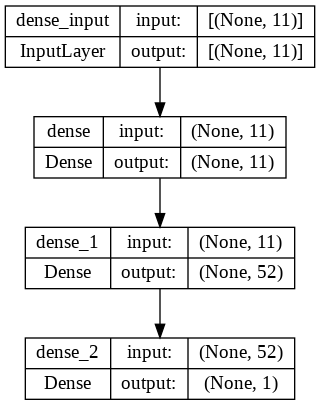

In [92]:
# Model plotting
tf.keras.utils.plot_model(model_seq1, show_shapes=True, show_layer_names=True)

#### Model Training - Sequential

In [93]:
history_seq=model_seq1.fit(train_dataset, validation_data=(val_dataset), epochs = 50)

Epoch 1/50
99/99 [==============================] - 1s 7ms/step - loss: 0.5739 - accuracy: 0.6856 - val_loss: 0.9080 - val_accuracy: 0.5129
Epoch 2/50
99/99 [==============================] - 0s 3ms/step - loss: 0.5664 - accuracy: 0.7141 - val_loss: 0.7412 - val_accuracy: 0.6176
Epoch 3/50
99/99 [==============================] - 0s 4ms/step - loss: 0.5490 - accuracy: 0.7254 - val_loss: 0.6616 - val_accuracy: 0.6548
Epoch 4/50
99/99 [==============================] - 0s 3ms/step - loss: 0.5361 - accuracy: 0.7330 - val_loss: 0.6293 - val_accuracy: 0.6655
Epoch 5/50
99/99 [==============================] - 0s 3ms/step - loss: 0.5317 - accuracy: 0.7311 - val_loss: 0.5999 - val_accuracy: 0.6761
Epoch 6/50
99/99 [==============================] - 0s 3ms/step - loss: 0.5250 - accuracy: 0.7338 - val_loss: 0.5848 - val_accuracy: 0.6841
Epoch 7/50
99/99 [==============================] - 0s 2ms/step - loss: 0.5229 - accuracy: 0.7381 - val_loss: 0.5726 - val_accuracy: 0.6868
Epoch 8/50
99/99 [==

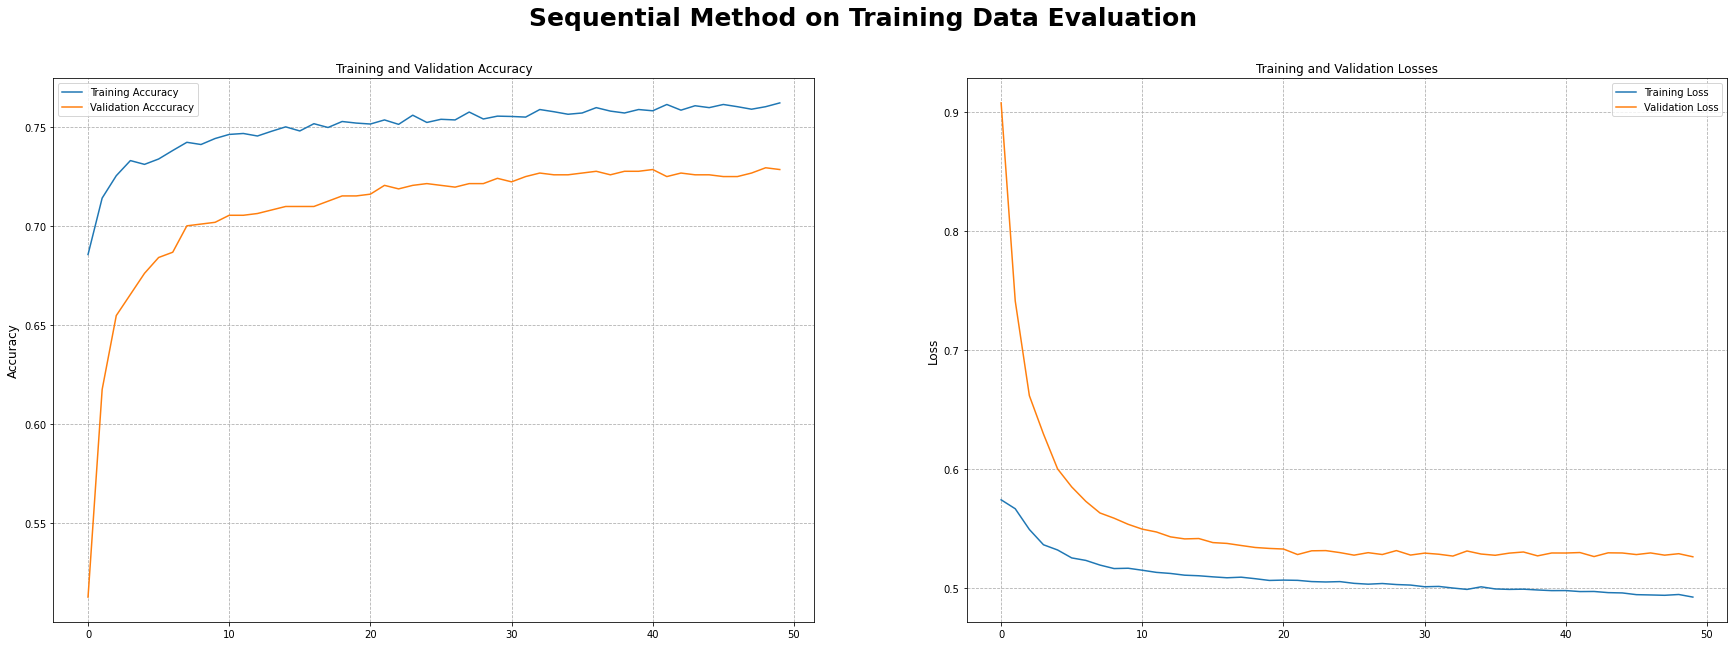

In [94]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential Method on Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_seq.history['accuracy'],label="Training Accuracy")
plt.plot(history_seq.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_seq.history['loss'], label="Training Loss")
plt.plot(history_seq.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

#### Model Improvement - Sequential 

In [95]:
# Sequential Model Architecture
model_seq2 = tf.keras.models.Sequential()

# Input layer
model_seq2.add(tf.keras.layers.Dense(inp, activation='relu', kernel_initializer='HeNormal', input_shape=(inp,))) 

# Hidden layer
model_seq2.add(tf.keras.layers.Dense(hid, activation='relu'))

# Output layer  
model_seq2.add(tf.keras.layers.Dense(out, activation='sigmoid'))

# Set the optimizer
optm2 = tf.keras.optimizers.Adagrad()

# Compiling the model
model_seq2.compile(optimizer = optm, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [96]:
model_seq2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 52)                624       
                                                                 
 dense_5 (Dense)             (None, 1)                 53        
                                                                 
Total params: 809
Trainable params: 809
Non-trainable params: 0
_________________________________________________________________


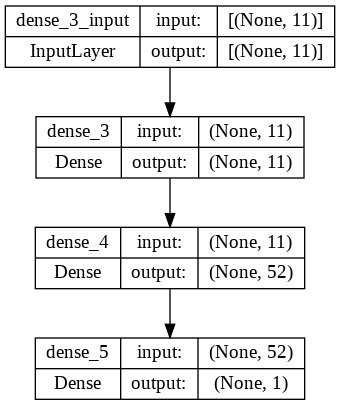

In [97]:
# Model plotting
tf.keras.utils.plot_model(model_seq2, show_shapes=True, show_layer_names=True)

In [98]:
#  Training the model
model_seq2.compile(loss='binary_crossentropy', 
                   optimizer=optm2,
                   metrics='accuracy')
model_seq2_history = model_seq2.fit(train_dataset, validation_data=(val_dataset), epochs = 50)

Epoch 1/50
99/99 [==============================] - 1s 4ms/step - loss: 0.6809 - accuracy: 0.5122 - val_loss: 0.6047 - val_accuracy: 0.7161
Epoch 2/50
99/99 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.5353 - val_loss: 0.5911 - val_accuracy: 0.7258
Epoch 3/50
99/99 [==============================] - 0s 2ms/step - loss: 0.6430 - accuracy: 0.5860 - val_loss: 0.5810 - val_accuracy: 0.7400
Epoch 4/50
99/99 [==============================] - 0s 2ms/step - loss: 0.6316 - accuracy: 0.6221 - val_loss: 0.5730 - val_accuracy: 0.7480
Epoch 5/50
99/99 [==============================] - 0s 3ms/step - loss: 0.6222 - accuracy: 0.6459 - val_loss: 0.5664 - val_accuracy: 0.7516
Epoch 6/50
99/99 [==============================] - 0s 2ms/step - loss: 0.6144 - accuracy: 0.6774 - val_loss: 0.5607 - val_accuracy: 0.7436
Epoch 7/50
99/99 [==============================] - 0s 3ms/step - loss: 0.6076 - accuracy: 0.6858 - val_loss: 0.5558 - val_accuracy: 0.7471
Epoch 8/50
99/99 [==

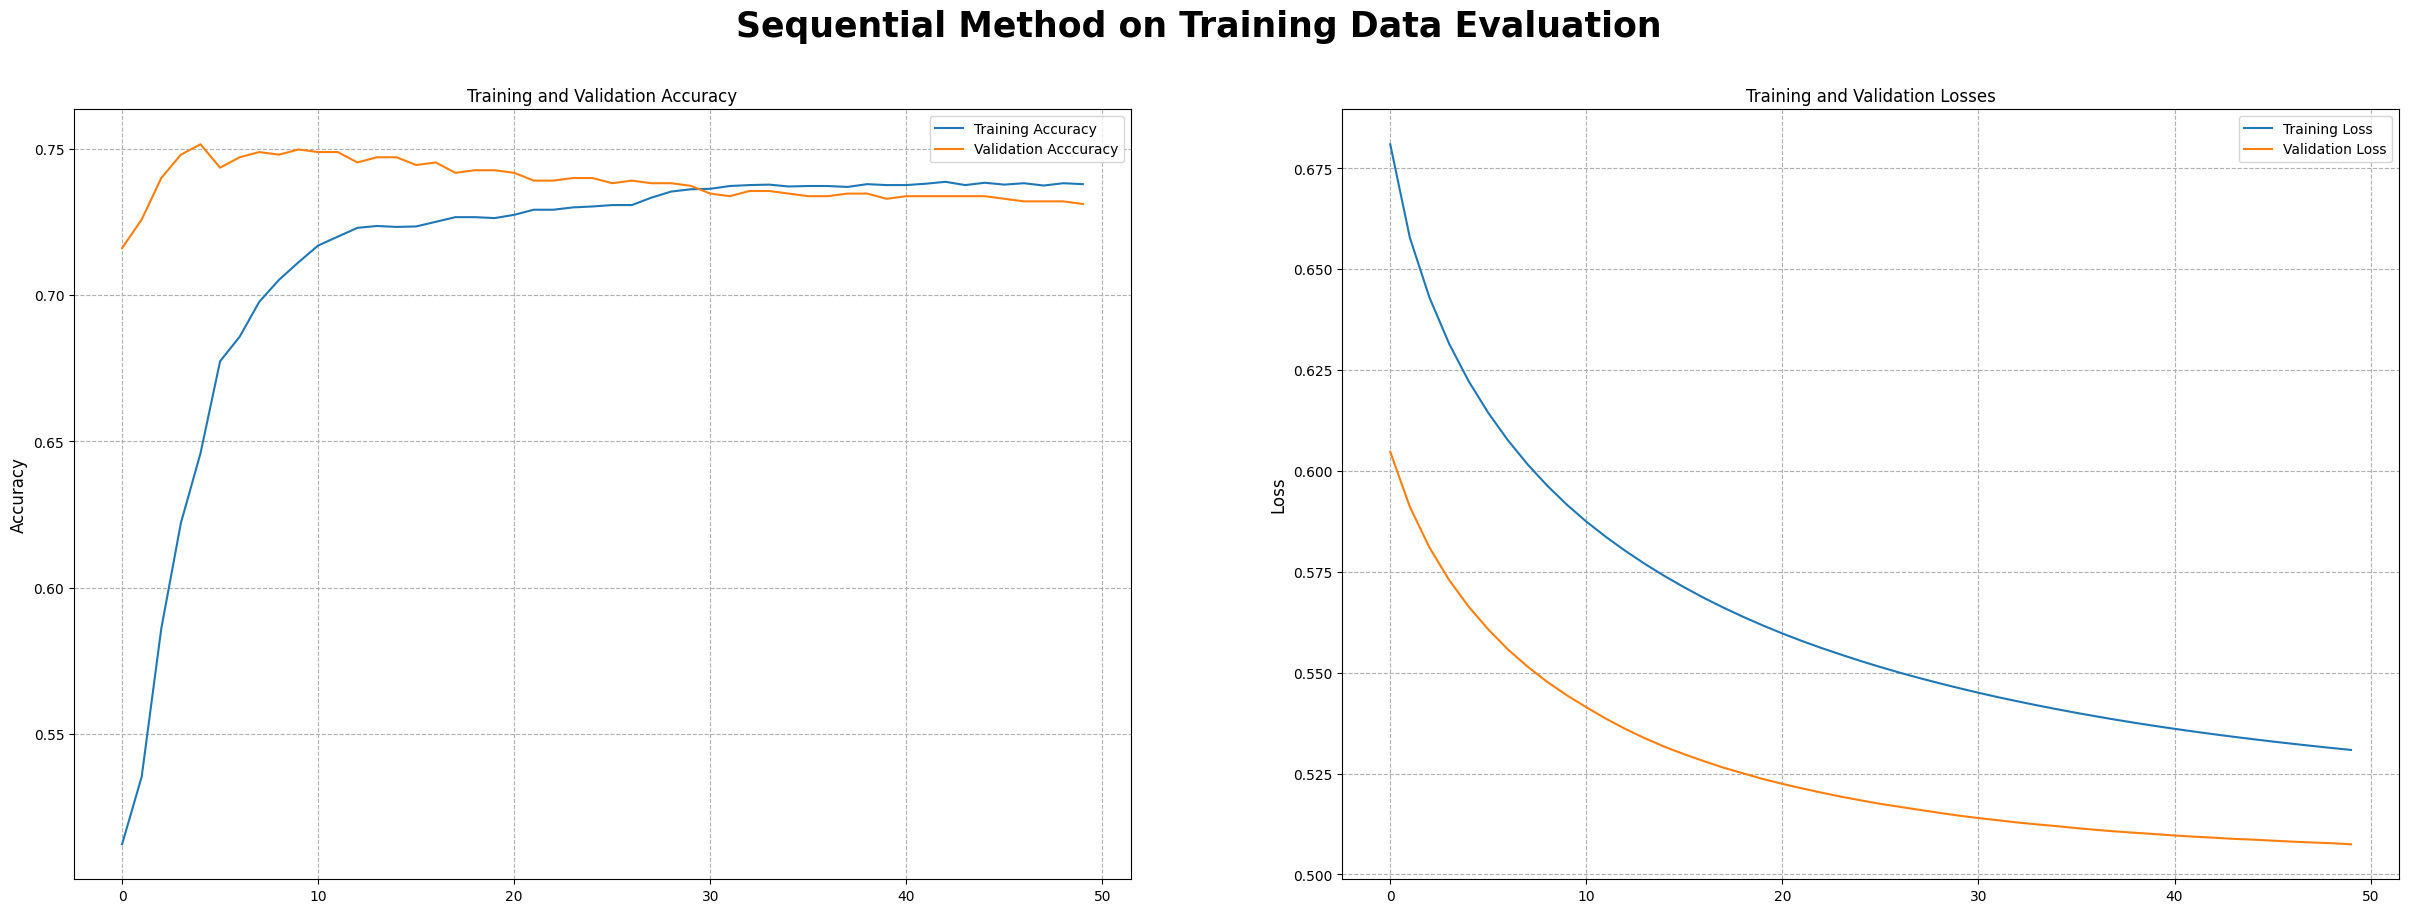

In [99]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential Method on Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(model_seq2_history.history['accuracy'],label="Training Accuracy")
plt.plot(model_seq2_history.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(model_seq2_history.history['loss'], label="Training Loss")
plt.plot(model_seq2_history.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Jika dilihat dari visualisasi Accuracy, untuk jarak terdekat antara training accuracy dengan validation sekitar 0,01 dengan ephoc 50. Pada saat epoc sebesar 30 garis berpotongan di nilai acurracy sebesar 0.74. Untuk nilai loss nya pun ada di ephoc 50, dengan selisih sekitas 0,025 poin. Model ini cukup bagus. Mari kita lihat evaluasinya.

### Functional

In [100]:
# Setting the neuron
n_neuronFunc = (12, 6)
n_feature = X_resampled.shape[1]

# Input layer
data_input = Input(shape=(n_feature, )) # INPUT LAYER
hidden = data_input

# Hidden layer
for n in n_neuronFunc: # HIDDEN LAYER
    hidden = Dense(n, activation='relu')(hidden)
data_output = Dense(1, activation='sigmoid')(hidden) 

# Output layer
model_func = Model(inputs=data_input, outputs=data_output)

# Compile Model_Functional
model_func.compile(
    loss='binary_crossentropy',
    optimizer=optm, 
    metrics=['accuracy']
)

In [101]:
# Model summary
model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense_6 (Dense)             (None, 12)                144       
                                                                 
 dense_7 (Dense)             (None, 6)                 78        
                                                                 
 dense_8 (Dense)             (None, 1)                 7         
                                                                 
Total params: 229
Trainable params: 229
Non-trainable params: 0
_________________________________________________________________


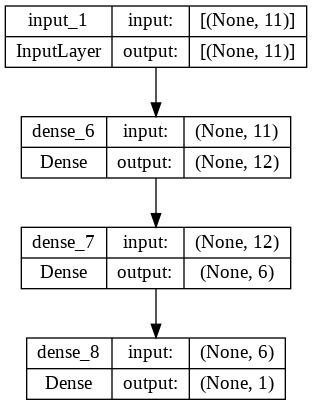

In [102]:
# Model plotting
tf.keras.utils.plot_model(model_func, show_shapes = True)

#### Model Training - Functional 

In [103]:
# Training the model
history_func = model_func.fit(train_dataset, validation_data = (val_dataset), epochs = 50)

Epoch 1/50
99/99 [==============================] - 1s 4ms/step - loss: 0.5285 - accuracy: 0.7370 - val_loss: 0.8286 - val_accuracy: 0.5182
Epoch 2/50
99/99 [==============================] - 0s 2ms/step - loss: 0.5451 - accuracy: 0.7255 - val_loss: 0.6504 - val_accuracy: 0.6318
Epoch 3/50
99/99 [==============================] - 0s 2ms/step - loss: 0.5374 - accuracy: 0.7309 - val_loss: 0.5754 - val_accuracy: 0.6788
Epoch 4/50
99/99 [==============================] - 0s 3ms/step - loss: 0.5240 - accuracy: 0.7449 - val_loss: 0.5552 - val_accuracy: 0.6921
Epoch 5/50
99/99 [==============================] - 0s 3ms/step - loss: 0.5184 - accuracy: 0.7436 - val_loss: 0.5435 - val_accuracy: 0.7036
Epoch 6/50
99/99 [==============================] - 0s 2ms/step - loss: 0.5162 - accuracy: 0.7452 - val_loss: 0.5351 - val_accuracy: 0.7090
Epoch 7/50
99/99 [==============================] - 0s 3ms/step - loss: 0.5126 - accuracy: 0.7510 - val_loss: 0.5279 - val_accuracy: 0.7134
Epoch 8/50
99/99 [==

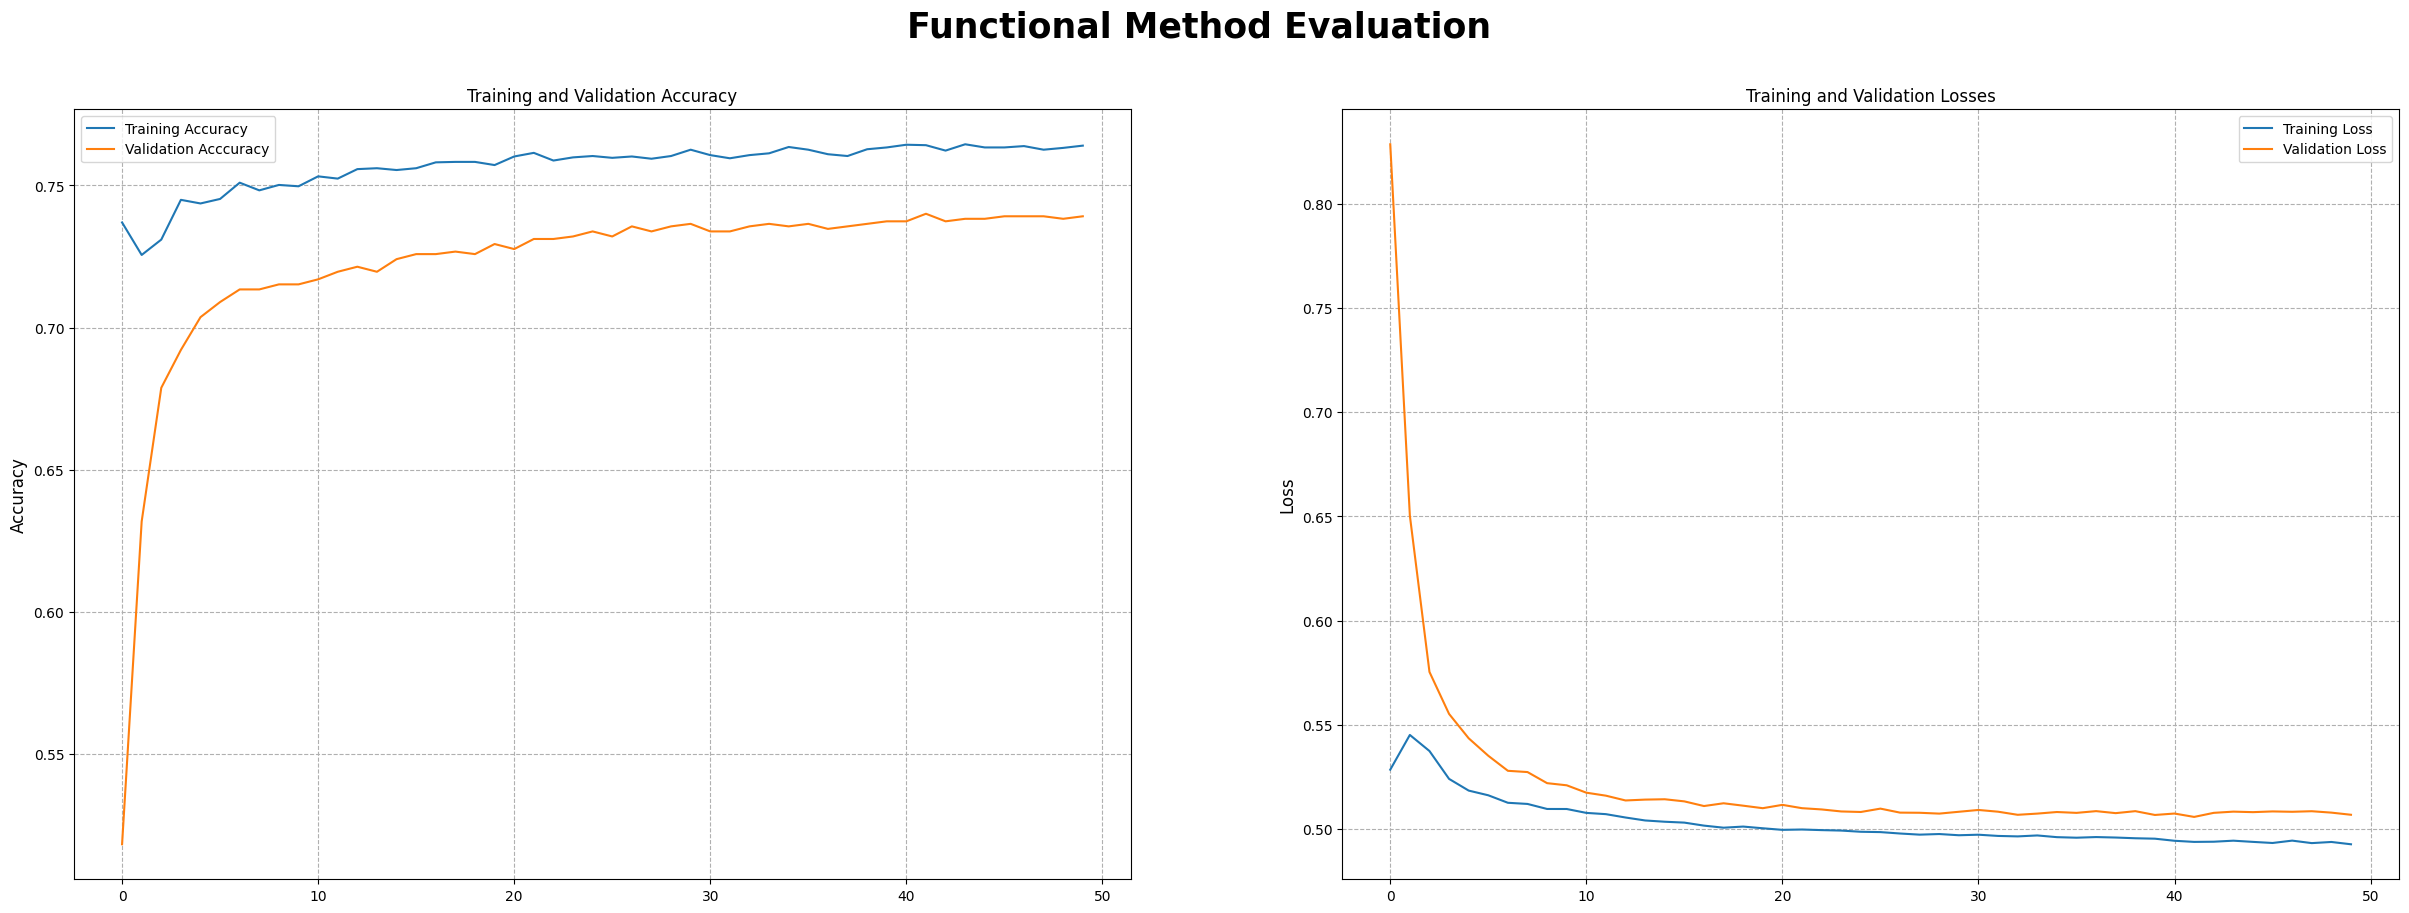

In [104]:
# Loss and accuracy model plotting
fig, ax = plt.subplots(1, 2, figsize = (30, 10))
fig.suptitle('Functional Method Evaluation', fontsize = 25, weight = 'bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize = 12)
plt.plot(history_func.history['accuracy'], label = "Training Accuracy")
plt.plot(history_func.history['val_accuracy'], label = "Validation Acccuracy")
plt.ylabel("Accuracy", fontsize = 12)
plt.legend()
plt.grid(linestyle = '--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize = 12)
plt.plot(history_func.history['loss'], label = "Training Loss")
plt.plot(history_func.history['val_loss'], label = "Validation Loss")
plt.ylabel("Loss", fontsize = 12)
plt.legend()
plt.grid(linestyle = '--')

plt.style.use('default')
plt.show()

#### Model Improvement - Functional

In [105]:
n_neuronfunc = (12, 6)   

# Arsitektur Model_Functional
data_input_2 = Input(shape=(n_feature, ))                # Input Layer

hidden2 = data_input_2
for n in n_neuronfunc:                              # Hidden Layer
    hidden2 = Dense(n, activation='relu')(hidden2)

data_out = Dense(1, activation='sigmoid')(hidden2) # Output Layer

model_func2 = Model(inputs=data_input_2, outputs=data_out)

In [106]:
model_func2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense_9 (Dense)             (None, 12)                144       
                                                                 
 dense_10 (Dense)            (None, 6)                 78        
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 229
Trainable params: 229
Non-trainable params: 0
_________________________________________________________________


In [107]:
model_func2.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics='accuracy')
Imp_history_func = model_func2.fit(train_dataset, epochs=50, validation_data=(val_dataset))

Epoch 1/50
99/99 [==============================] - 1s 4ms/step - loss: 0.6487 - accuracy: 0.6623 - val_loss: 0.6378 - val_accuracy: 0.6451
Epoch 2/50
99/99 [==============================] - 0s 2ms/step - loss: 0.6392 - accuracy: 0.6710 - val_loss: 0.6300 - val_accuracy: 0.6469
Epoch 3/50
99/99 [==============================] - 0s 3ms/step - loss: 0.6307 - accuracy: 0.6899 - val_loss: 0.6225 - val_accuracy: 0.6575
Epoch 4/50
99/99 [==============================] - 0s 3ms/step - loss: 0.6227 - accuracy: 0.7031 - val_loss: 0.6152 - val_accuracy: 0.6708
Epoch 5/50
99/99 [==============================] - 0s 2ms/step - loss: 0.6154 - accuracy: 0.7109 - val_loss: 0.6078 - val_accuracy: 0.6806
Epoch 6/50
99/99 [==============================] - 0s 2ms/step - loss: 0.6085 - accuracy: 0.7166 - val_loss: 0.6007 - val_accuracy: 0.6850
Epoch 7/50
99/99 [==============================] - 0s 3ms/step - loss: 0.6017 - accuracy: 0.7211 - val_loss: 0.5935 - val_accuracy: 0.6868
Epoch 8/50
99/99 [==

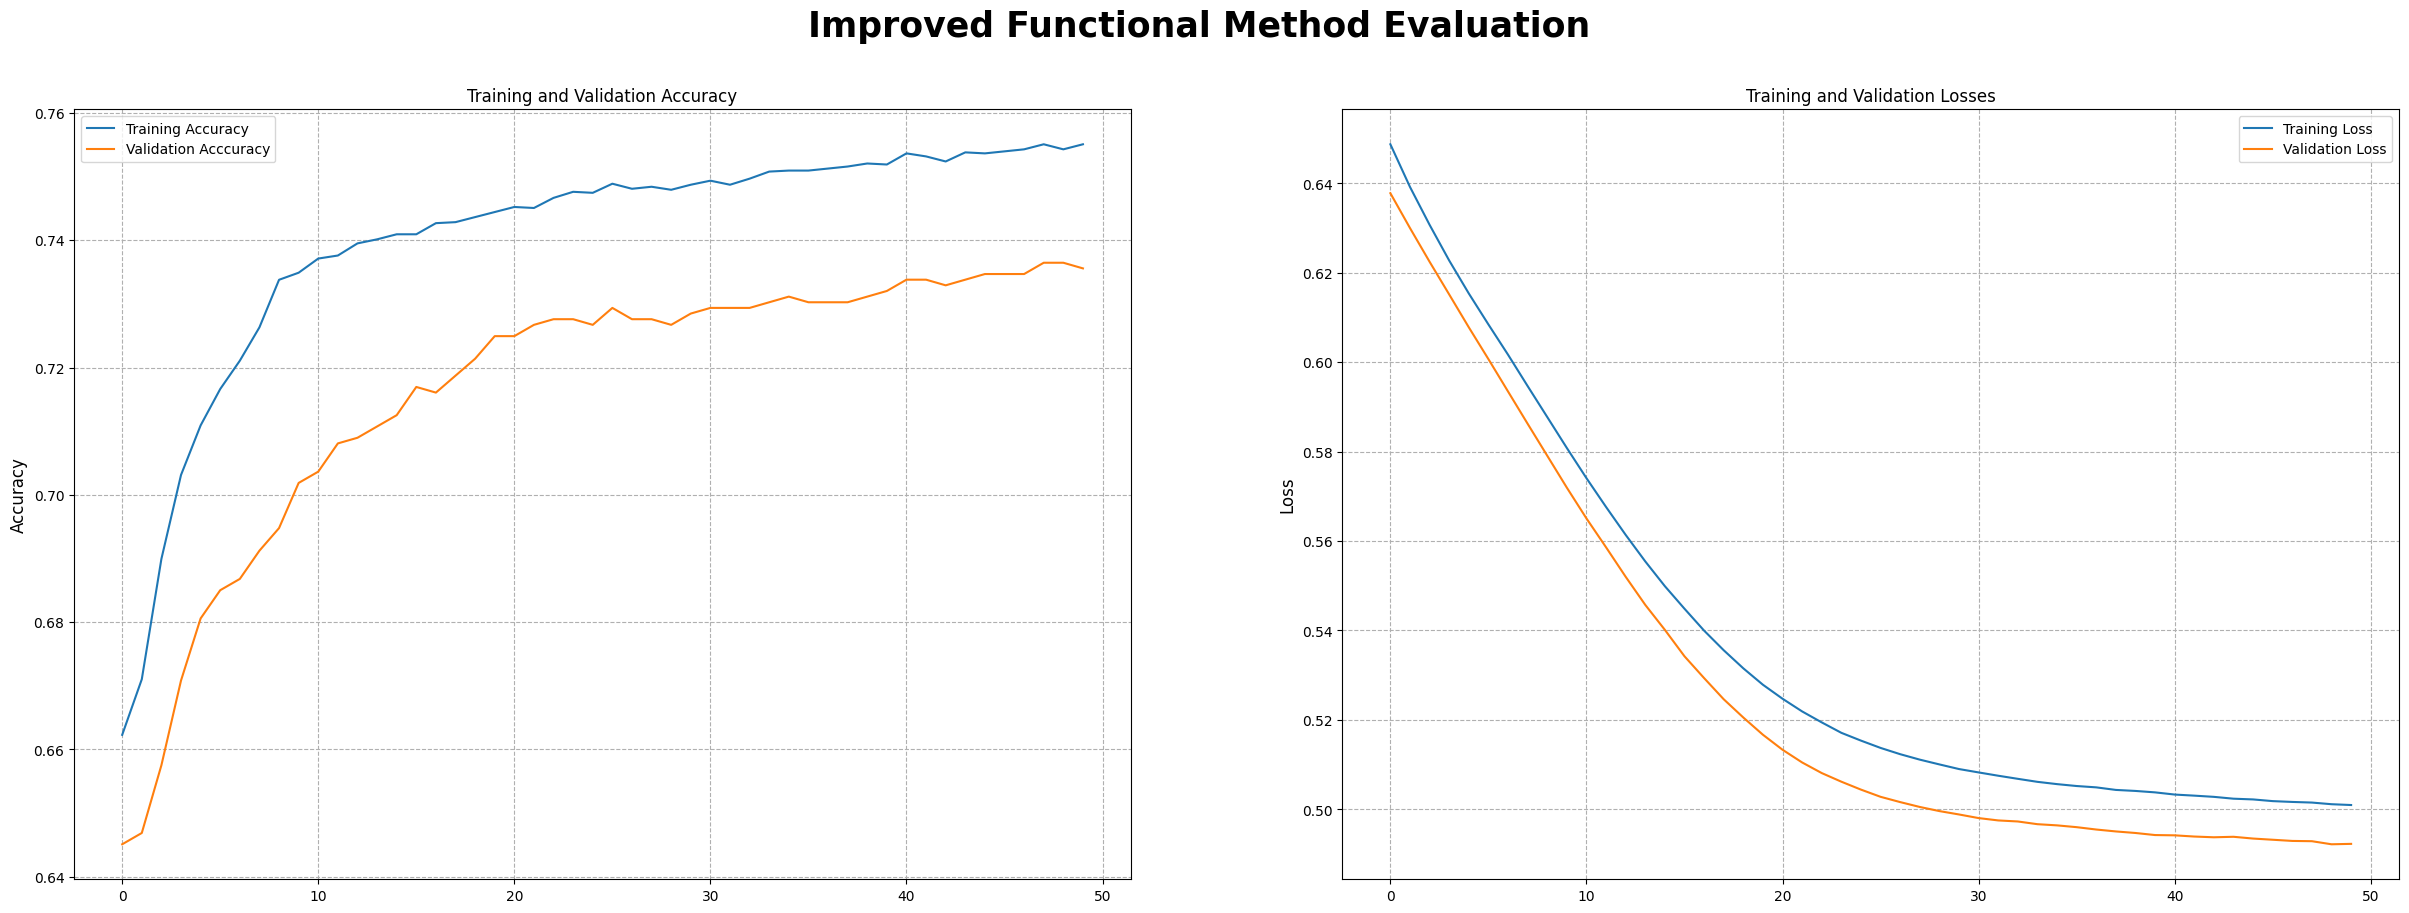

In [108]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Improved Functional Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(Imp_history_func.history['accuracy'],label="Training Accuracy")
plt.plot(Imp_history_func.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(Imp_history_func.history['loss'], label="Training Loss")
plt.plot(Imp_history_func.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Jika dilihat dari visualisasi Accuracy, untuk jarak terdekat antara training accuracy dengan validation sekitar 0,02 dengan ephoc 50. Untuk nilai loss nya pun ada di ephoc 50, dengan selisih sekitas 0,01 poin. Model ini cukup bagus. Mari kita lihat evaluasinya.

## Model Evaluation 

### Sequential 

menggunakan model sequential yang sudah di improve

23/23 [==============================] - 0s 1ms/step
========== TEST ==========
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.77      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.74      0.75      1409



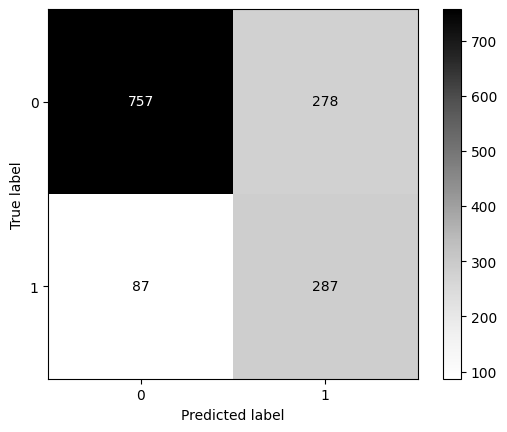

In [109]:
# predict probabilities
y_pred_sequent = model_seq2.predict(test_dataset)
y_pred_sequent = (y_pred_sequent > 0.5)

# classification report
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_sequent, zero_division=0))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_sequent)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Greys')
plt.show()

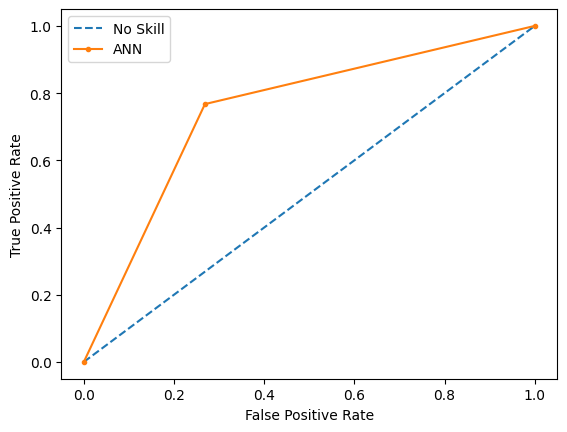

AUC score: 0.74939032266398


In [110]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sequent)
auc = roc_auc_score(y_test, y_pred_sequent)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print(f'AUC score: {auc}')

Dari hasil model evaluation kita fokus ke nilai recall yaitu predict 1 sebesar 0.77, untuk confusion matrix nilai false negative nya 87 dan kita lihat dari nilai UC score dimana ditetapkan treshold sebesar 0,5 dan skor metode sekuensial kali ini adalah 0,749 jadi model ini cukup bagus.

### Functional

menggunakan model functional yang sudah di improve 

23/23 [==============================] - 0s 1ms/step
========== TEST ==========
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1035
           1       0.50      0.79      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



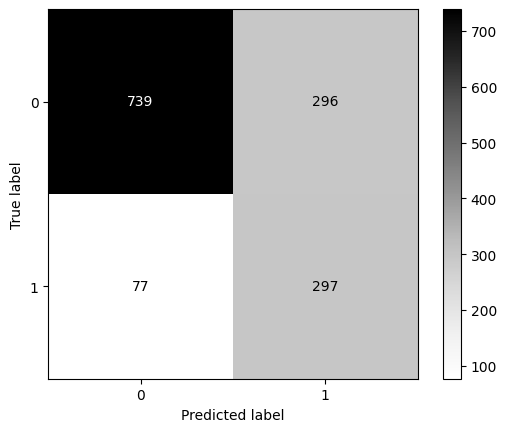

In [111]:
# predict probabilities
y_pred_func = model_func2.predict(test_dataset)
y_pred_func = (y_pred_func > 0.5)

# classification report
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_func, zero_division=0))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_func)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greys')
plt.show()

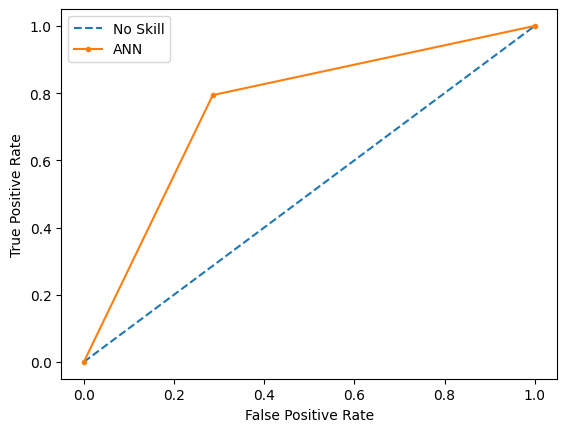

AUC score: 0.7540636544472861


In [112]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_func)
auc = roc_auc_score(y_test, y_pred_func)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print(f'AUC score: {auc}')

Dari hasil model evaluation kita fokus ke nilai recall yaitu predict 1 sebesar 0.79,untuk confusion matrix nilai false negative nya 77 dan kita lihat dari nilai UC score dimana ditetapkan treshold sebesar 0,5 dan skor metode sekuensial kali ini adalah 0,754 jadi model ini cukup bagus.

dari kedua model diatas didapatkan bahwa model yang cukup bagus untuk masuk ke model saving dan inference adalah model yang functional. 

## Model Saving

In [113]:
pickle.dump(full_pipeline, open('model_milestones1.pkl','wb'))

model_func2.save('model_churn.h5')

In [114]:
import sklearn
print(tf.__version__)
print(sklearn.__version__)
print(np.__version__)

2.9.2
1.0.2
1.21.6


## Model Inference

Menggunakan data baru untuk inference

In [115]:
inference = {'tenure': 34,
 'TotalCharges': 1993.56,
 'MonthlyCharges': 103.20,
 'Contract': 'One year',
 'PaymentMethod': 'Credit card (automatic)',
 'InternetService': 'DSL',
 'SeniorCitizen': 1,
 'Dependents': 'Yes'}

inferences = pd.DataFrame([inference])
inferences

,tenure,TotalCharges,MonthlyCharges,Contract,PaymentMethod,InternetService,SeniorCitizen,Dependents
0,34,1993.56,103.2,One year,Credit card (automatic),DSL,1,Yes


Menggunakan pipeline untuk transform ke dalam data inference. 

In [116]:
data_inf = full_pipeline.transform(inferences)

In [117]:
inf_predict = np.round(model_func2.predict(np.array([data_inf[0]]))[0][0])
inf_predict

1/1 [==============================] - 0s 53ms/step


0.0

In [118]:
# interpretation for churn
if inf_predict == 0.0:
    print("The customer will not churn")
else:
    print("The customer will churn")

The customer will not churn


## Kesimpulan 

- Model Functional dapat memprediksi Churn dengan cukup baik pada analisis ini. 
- Dilihat dari nilai evaluation score, baik dari classification report bagian recall maupun confusion matrix bagian false negative, dan AUC score, nilai dari model functional lebih baik performanya dibanding dengan sequential  
- Kekurangan dari model ini adalah belum maksimal dalam melakukan hyperparamater sehingga nilai nya masih belum sempurna. 
- Kedepannya diharapkan dapat mencoba hyperparameter lain,juga pemilihan fature selection dengan lebih baik menggunakan cara cara lain, dan memilih data yang balance. 